#### About Dataset :

Which countries pay the most and least for Netflix in 2021?

Netflix subscription fee in different countries.

Acknowledgements:

Data source: https://www.comparitech.com/blog/vpn-privacy/countries-netflix-cost/
Cover image credit: https://www.pexels.com/photo/light-man-people-woman-5112410/

In [27]:
pip install pandas-profiling

In [3]:
#importing packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
plt.style.use('ggplot')
import ydata_profiling

In [4]:
df = pd.read_csv(r"C:\Users\opandey2\Desktop\netflix-price-in-different-countries.csv")
df.head(5)

Country  Total Library Size  No. of TV Shows  No. of Movies  \
0  Argentina                4760             3154           1606   
1    Austria                5640             3779           1861   
2    Bolivia                4991             3155           1836   
3   Bulgaria                6797             4819           1978   
4      Chile                4994             3156           1838   

   Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                        3.74                           6.30   
1                        9.03                          14.67   
2                        7.99                          10.99   
3                        9.03                          11.29   
4                        7.07                           9.91   

   Cost Per Month - Premium ($)  
0                          9.26  
1                         20.32  
2                         13.99  
3                         13.54  
4                         12.74

In [5]:
#Checking datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


Country : Name Countries

Total Library Size : (Sum of Movies and Show) or Total itmes in a one month plan

No. Of TV Shows : Totel Shows/Webseries in a one month Plan

No. Of Movies : Total Movies in a one month Plan

Cost Per Month - Basic : Basic Plan for One month

Cost Per Month - Standard : Standard Plan For One month

Cost Per Month - Premium : Premium Plan for One month

#### Profilling:
The pandas profiling library can create, in a few lines of code, a rich and interactive suite of exploratory data analysis (EDA) tables and visualizations.

In [6]:
profiling = ydata_profiling.ProfileReport(df)
profiling.to_file("profiling.html")
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#Checking for missing and duplicate values

#Finding columns of missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [10]:
#Finding total missing values in columns
df.isnull().sum()

Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64

In [11]:
#Checking duplicated values

df.duplicated().sum()

0

In [12]:
#Describing data

df.describe(include='all')

Country  Total Library Size  No. of TV Shows  No. of Movies  \
count          65           65.000000        65.000000      65.000000   
unique         65                 NaN              NaN            NaN   
top     Argentina                 NaN              NaN            NaN   
freq            1                 NaN              NaN            NaN   
mean          NaN         5314.415385      3518.953846    1795.461538   
std           NaN          980.322633       723.010556     327.279748   
min           NaN         2274.000000      1675.000000     373.000000   
25%           NaN         4948.000000      3154.000000    1628.000000   
50%           NaN         5195.000000      3512.000000    1841.000000   
75%           NaN         5952.000000      3832.000000    1980.000000   
max           NaN         7325.000000      5234.000000    2387.000000   

        Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
count                    65.000000                      65.000000   
unique                         NaN                            NaN   
top                            NaN                            NaN   
freq                           NaN                            NaN   
mean                      8.368462                      11.990000   
std                       1.937819                       2.863979   
min                       1.970000                       3.000000   
25%                       7.990000                      10.710000   
50%                       8.990000                      11.490000   
75%                       9.030000                      13.540000   
max                      12.880000                      20.460000   

        Cost Per Month - Premium ($)  
count                      65.000000  
unique                           NaN  
top                              NaN  
freq                             NaN  
mean                       15.612923  
std                         4.040672  
min                         4.020000  
25%                        13.540000  
50%                        14.450000  
75%                        18.060000  
max                        26.960000

In [13]:
df['Country'].unique()

array(['Argentina', 'Austria', 'Bolivia', 'Bulgaria', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Czechia', 'Ecuador', 'Estonia', 'France',
       'Germany', 'Gibraltar', 'Greece', 'Guatemala', 'Honduras',
       'Hong Kong', 'Iceland', 'India', 'Israel', 'Italy', 'Japan',
       'Liechtenstein', 'Malaysia', 'Mexico', 'Moldova', 'Monaco',
       'Norway', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania',
       'Russia', 'San Marino', 'Slovakia', 'South Africa', 'South Korea',
       'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'Uruguay', 'Venezuela',
       'Belgium', 'Singapore', 'Finland', 'Latvia', 'New Zealand',
       'Hungary', 'Portugal', 'Netherlands', 'Sweden', 'Canada',
       'Lithuania', 'Spain', 'United Kingdom', 'Indonesia', 'Brazil',
       'Ireland', 'Switzerland', 'Australia', 'Denmark', 'United States'],
      dtype=object)

In [14]:
#Univariate Analysis

def univariate(variable):
    color=['red','blue','yellow','green','black']
    n=np.random.randint(0,5)
    clr=color[n]
    plt.figure(figsize=(10,6))
    plt.hist(df[variable],color=clr,bins=10)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist". format(variable))
    plt.show()

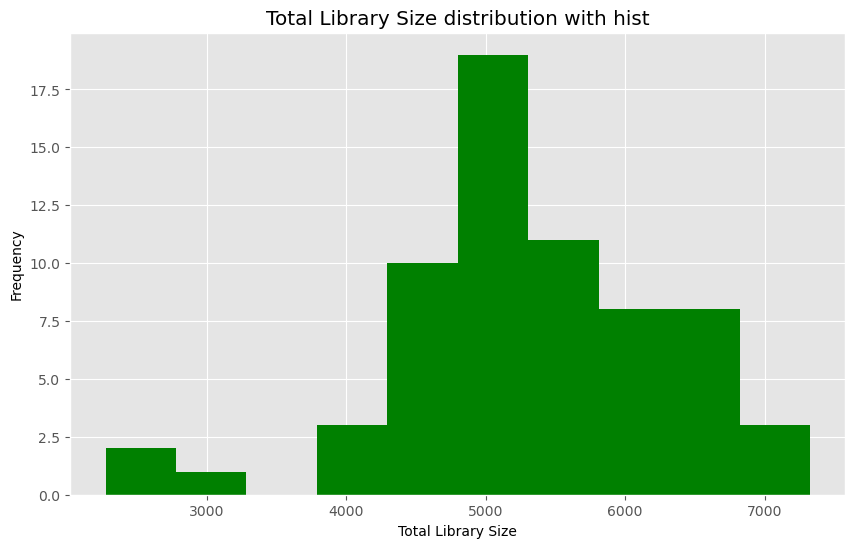

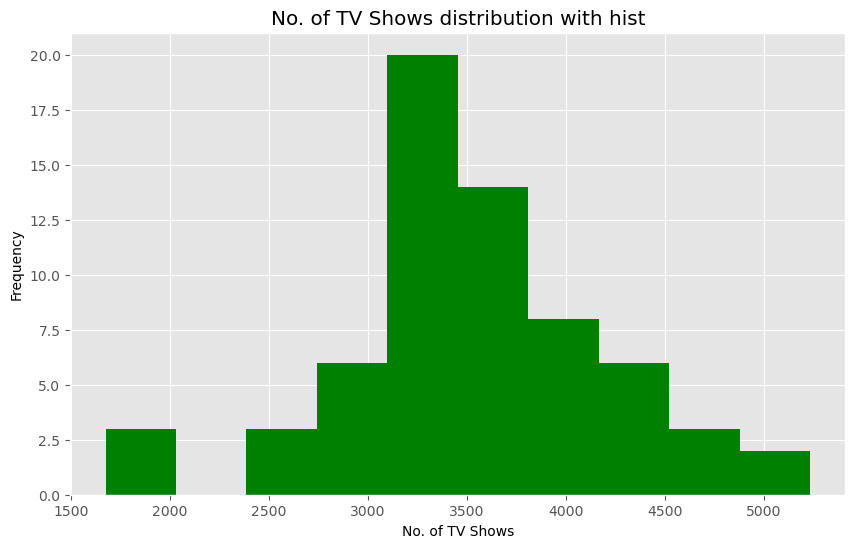

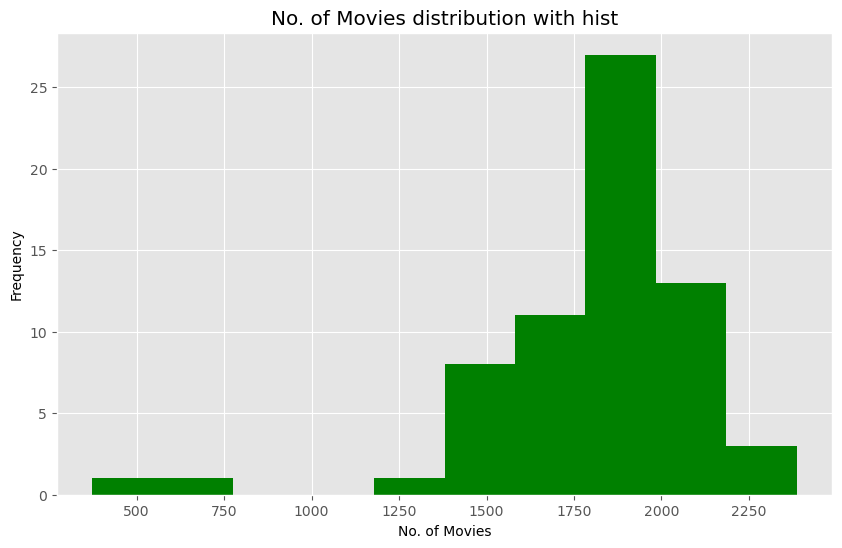

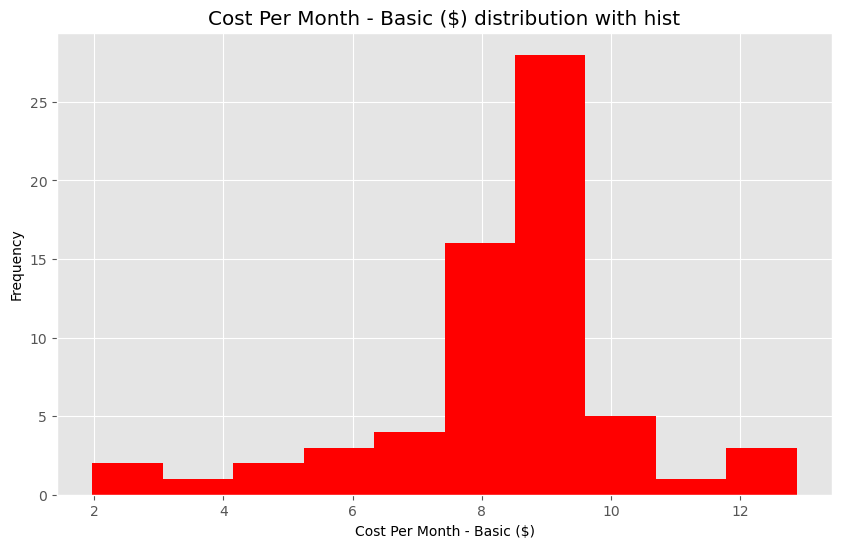

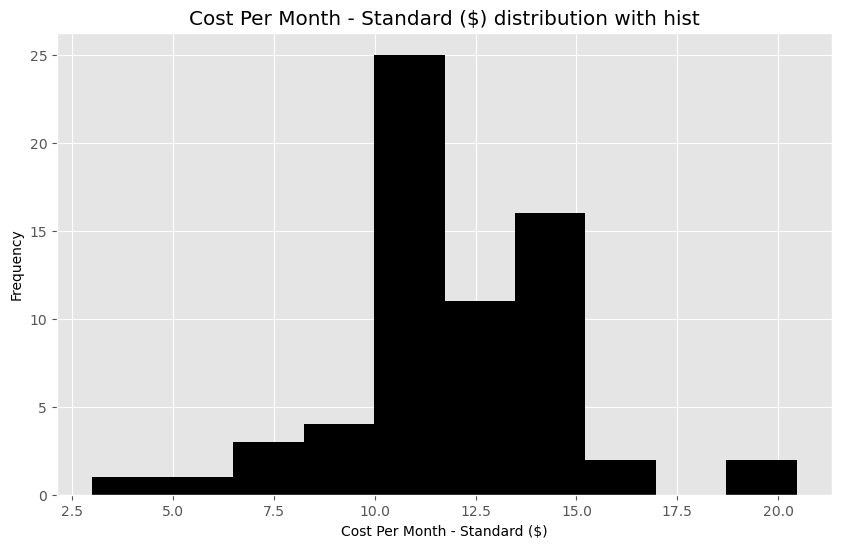

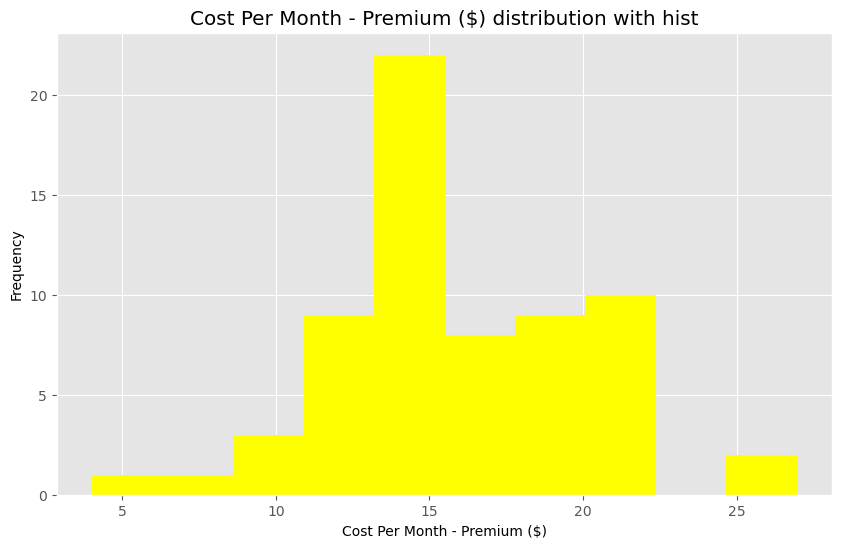

In [62]:
col = ['Total Library Size', 'No. of TV Shows', 'No. of Movies', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']

for i in col:
    univariate(i)

In [63]:
#Outlier present in all numerical columns

def univariate_box(variable):
    color=['red','blue','yellow','green','black']
    n=np.random.randint(0,5)
    clr=color[n]
    plt.figure(figsize=(10,6))
    sns.boxplot(df[variable],color=clr)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

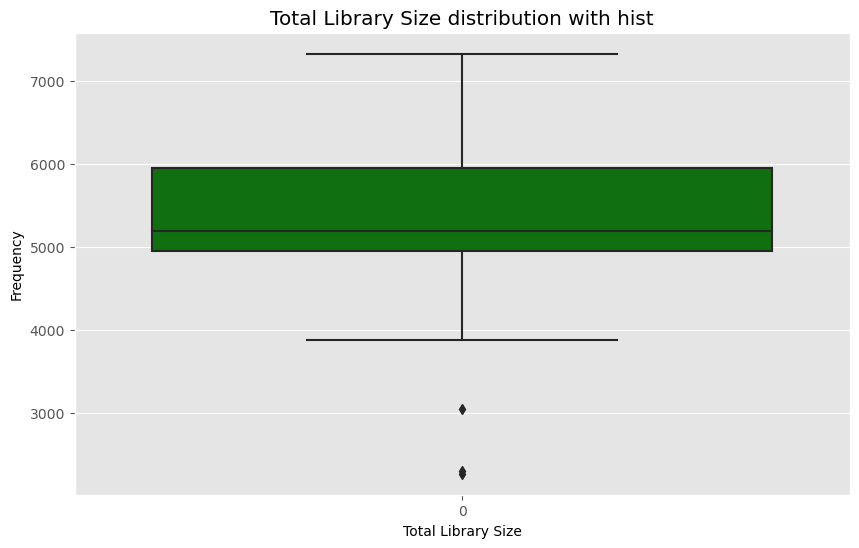

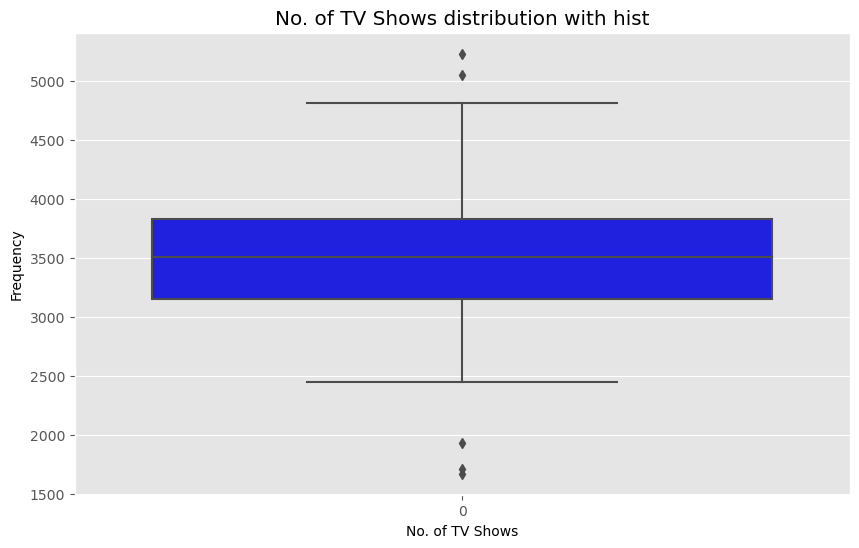

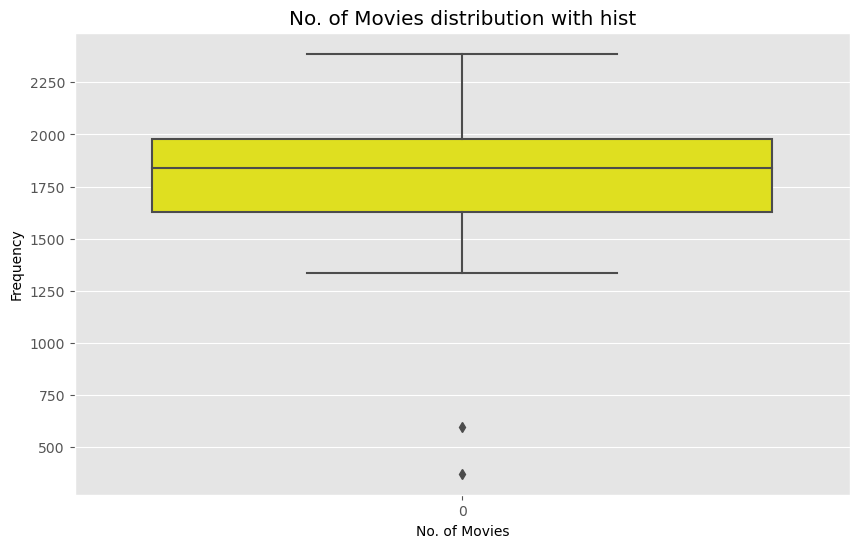

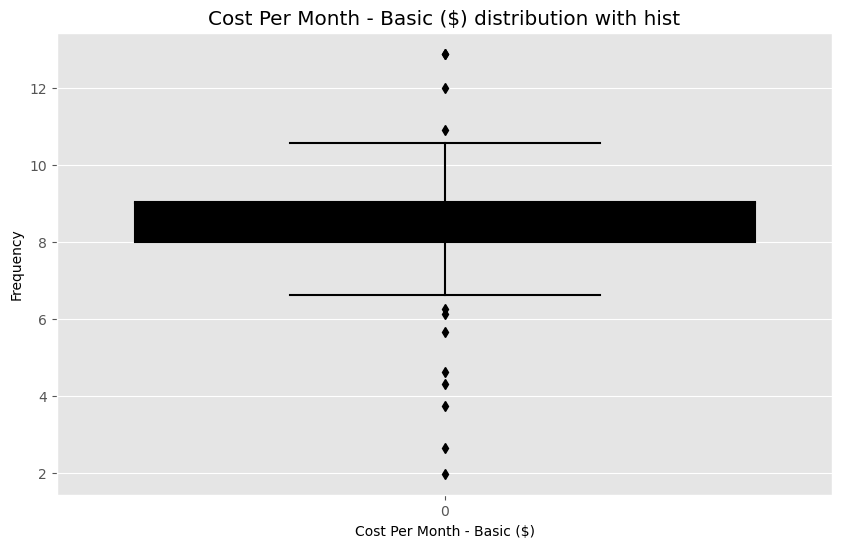

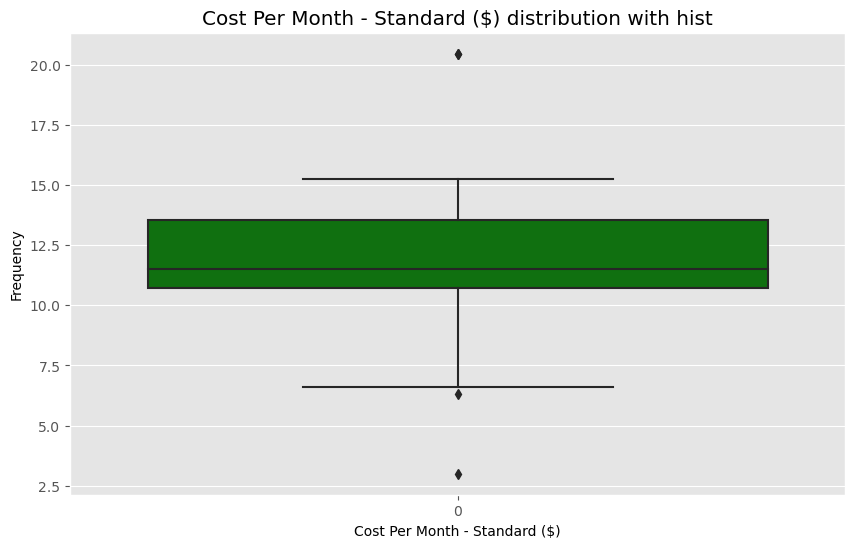

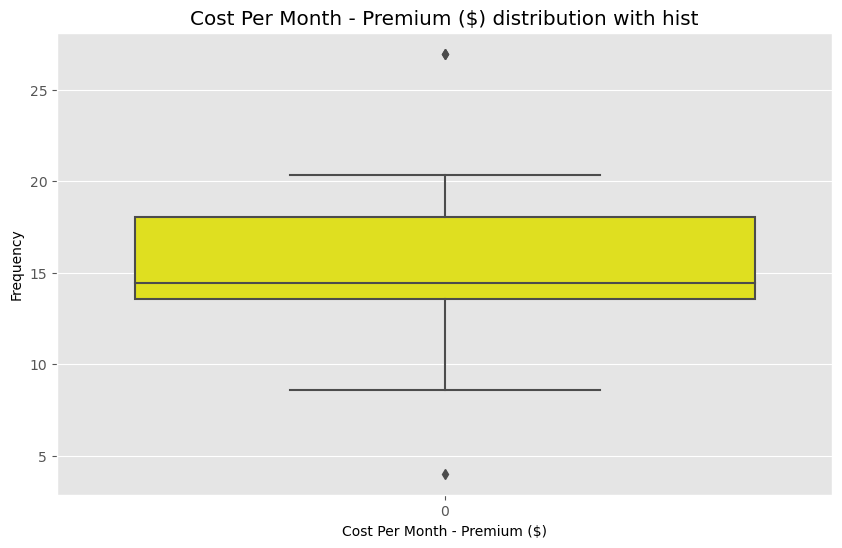

In [64]:
import warnings
warnings.filterwarnings("ignore")

for i in col:
    univariate_box(i)

In [21]:
#Bivariate Analysis

#plot scatter b/w shows, movies, size and cost

def Scatter(var1,var2):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x = df[var1], y = df[var2])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title("{0} vs {1}".format(var1,var2))
    plt.show()

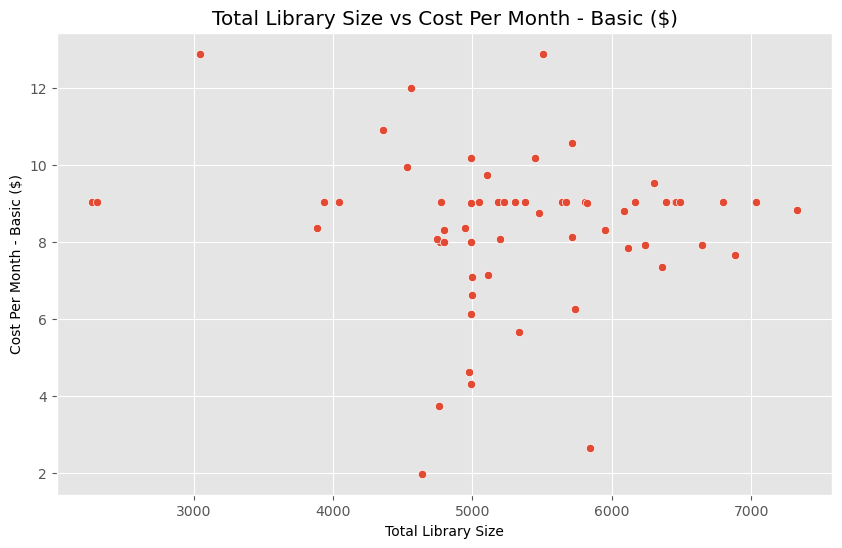

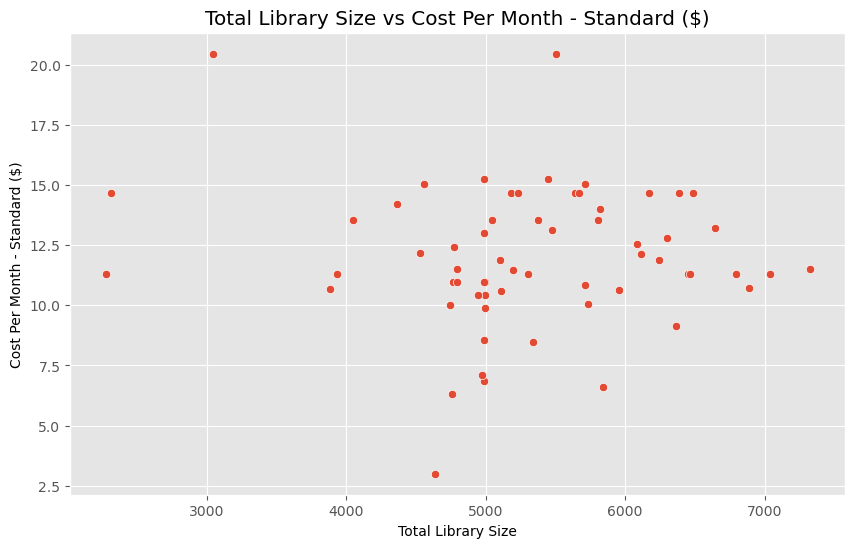

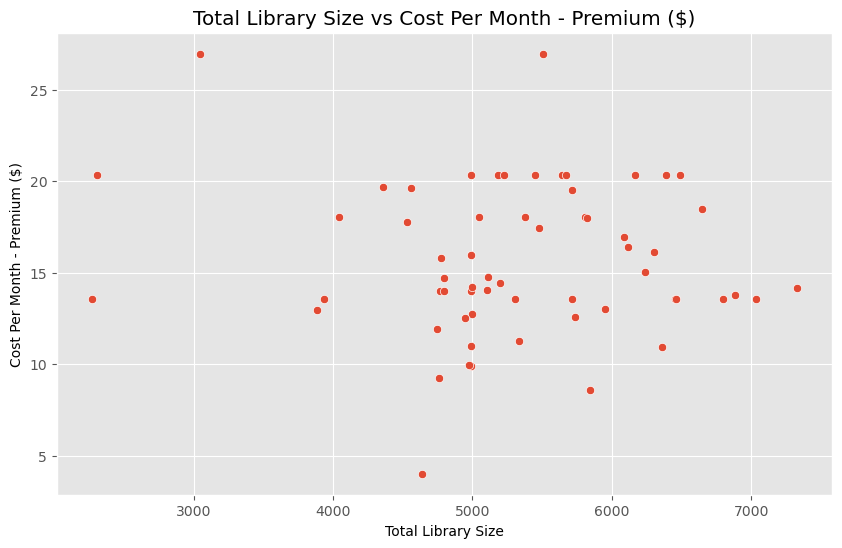

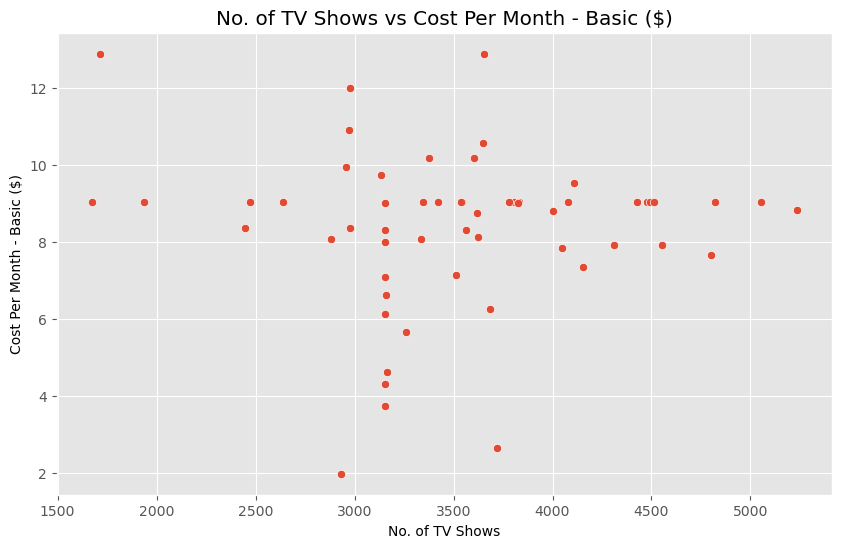

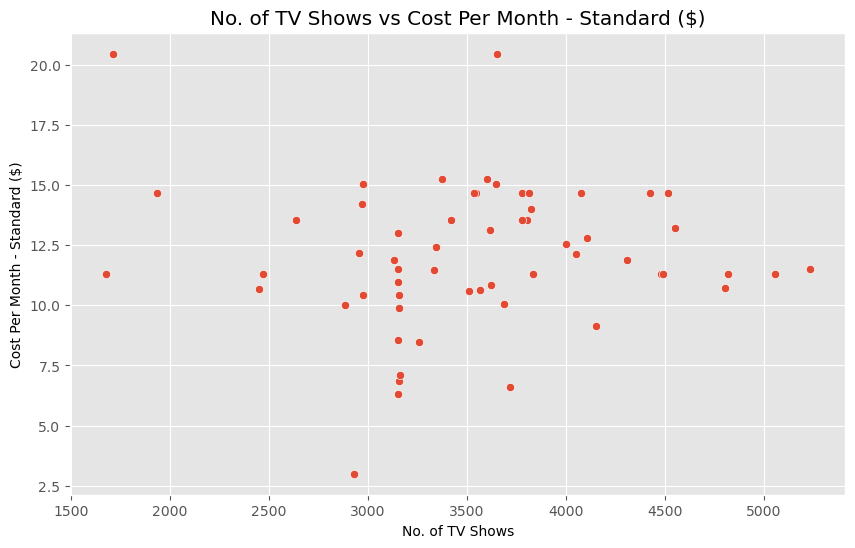

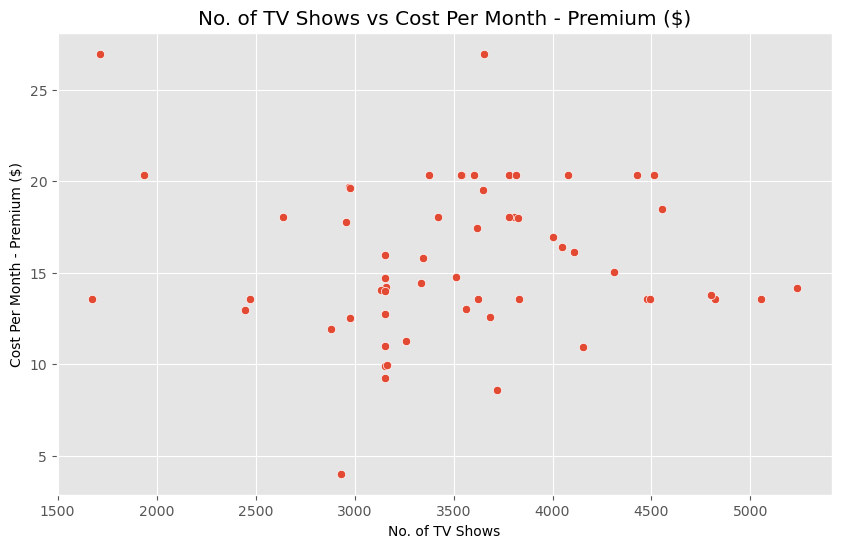

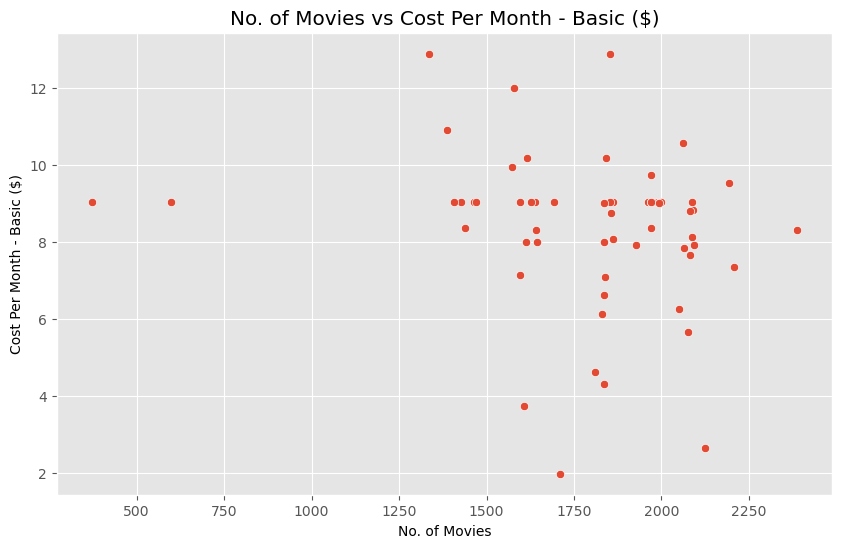

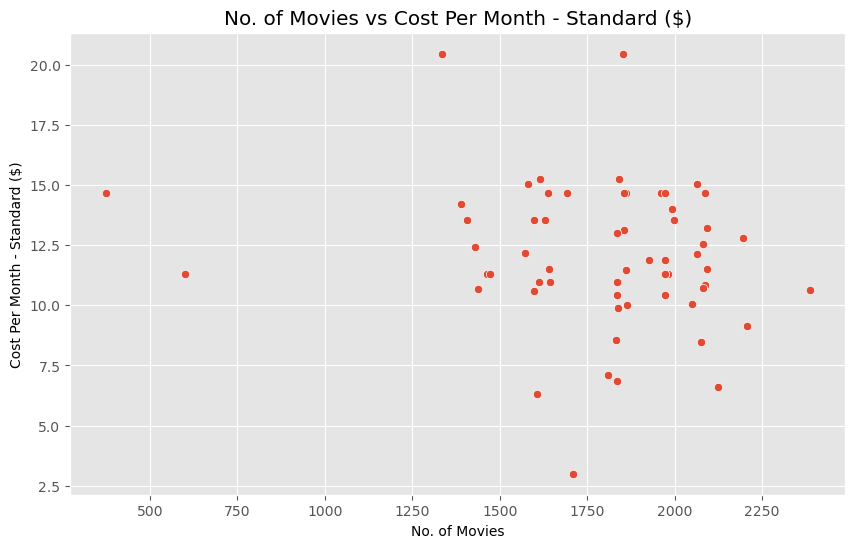

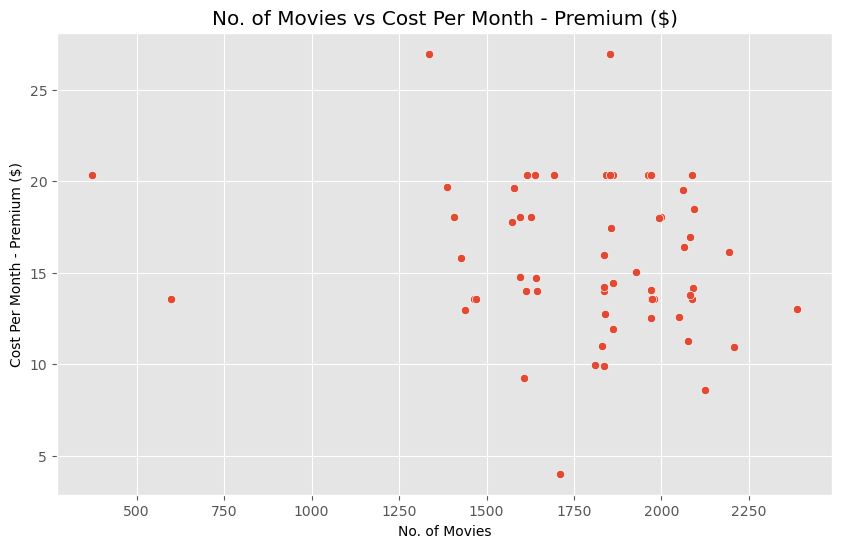

In [54]:
col1 = ['Total Library Size', 'No. of TV Shows', 'No. of Movies']
col2 = ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)','Cost Per Month - Premium ($)']

for i in col1:
    for j in col2:
        Scatter(i,j)

In [53]:
#plot scatter b/w shows, movies, size and costs

def Bar(var):
    plt.figure(figsize=(25,20))
    sns.barplot(x = df[var],y = df['Country'])
    plt.ylabel("Country")
    plt.xlabel(var)
    plt.title("{0} vs {1}".format('Country',var))
    plt.show()

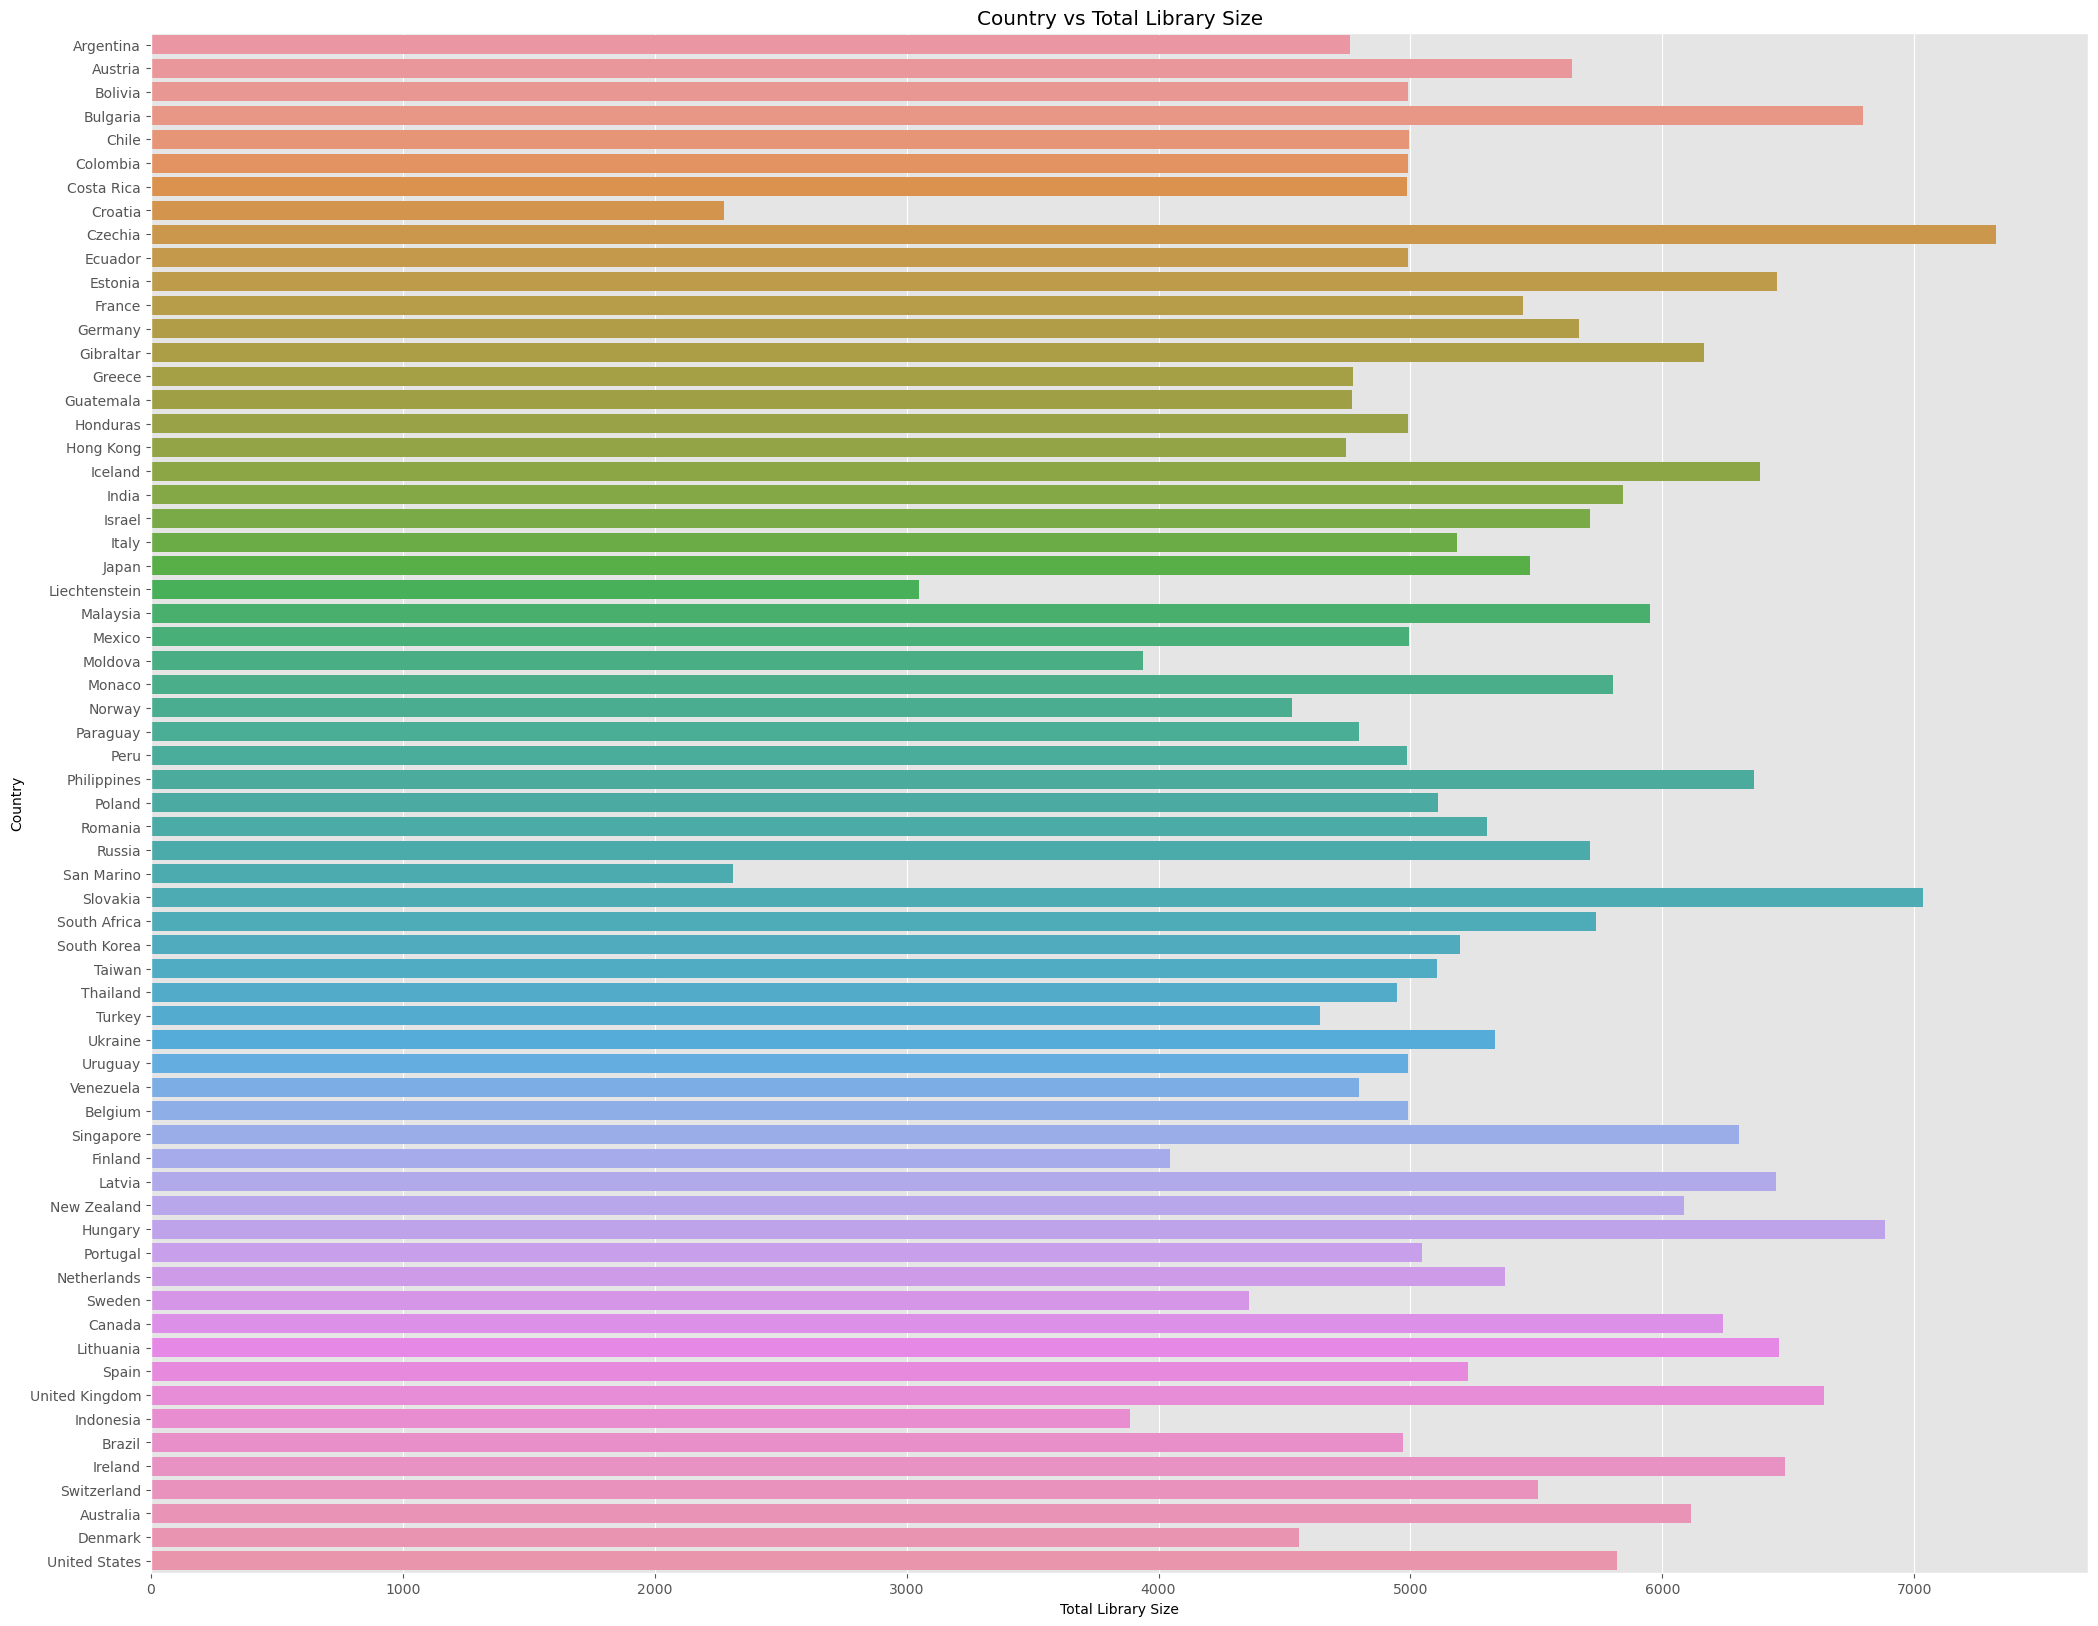

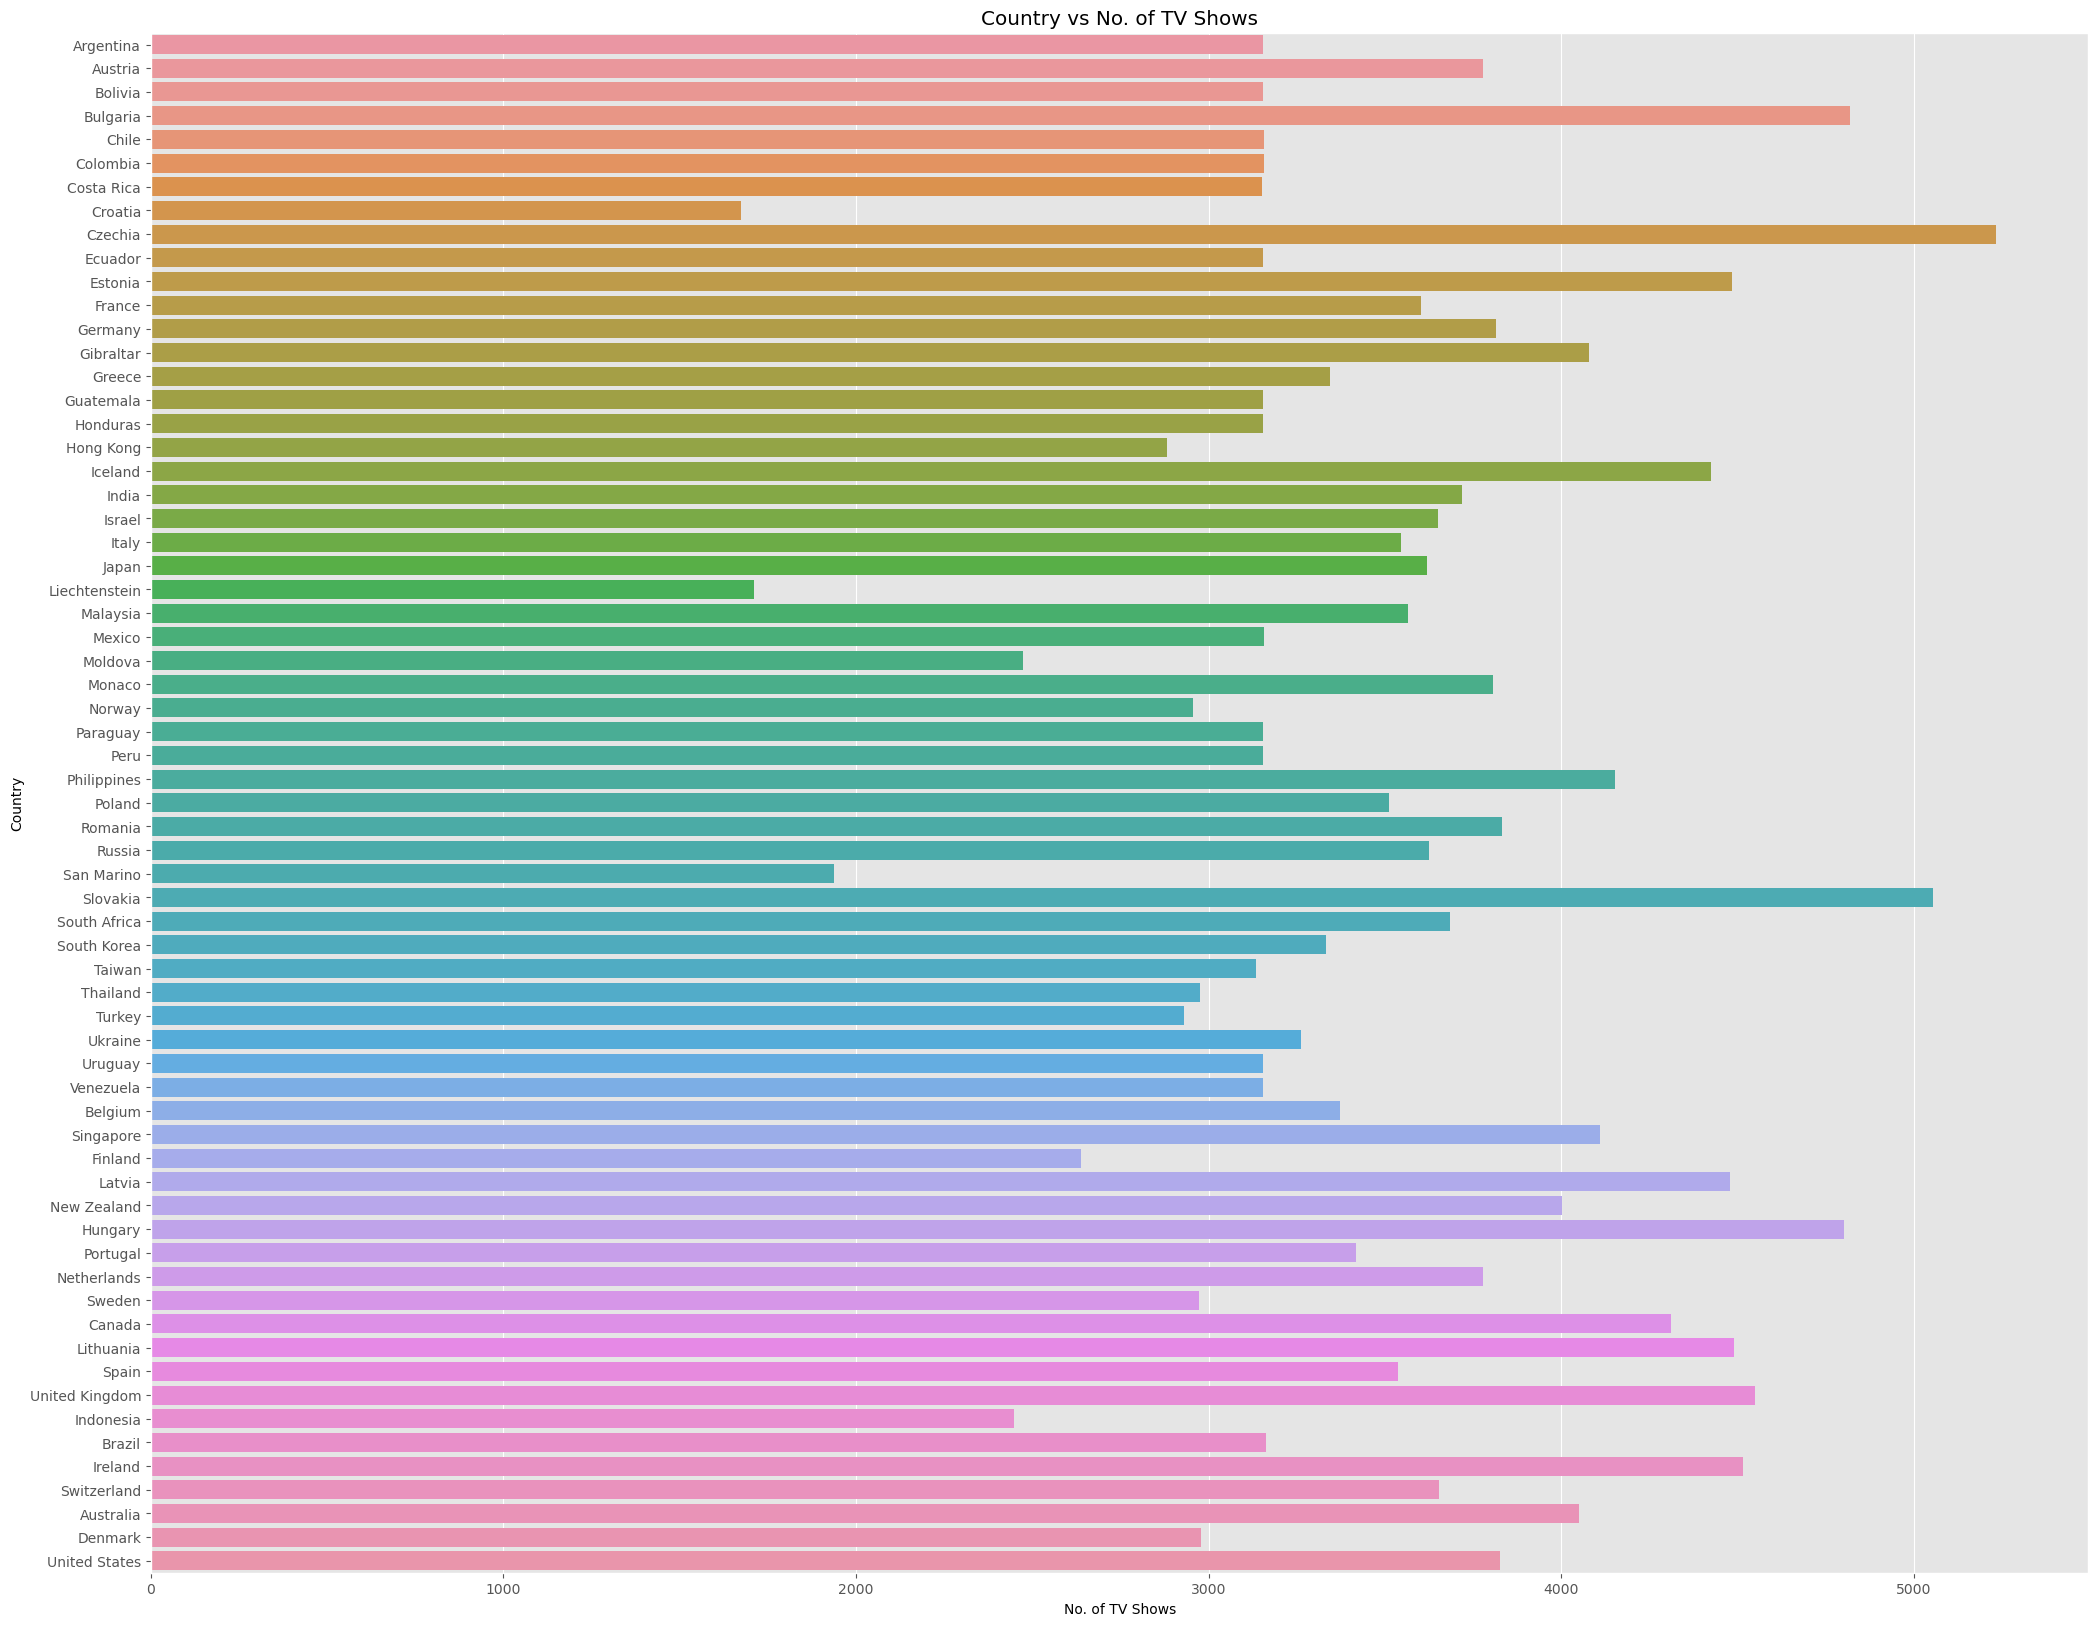

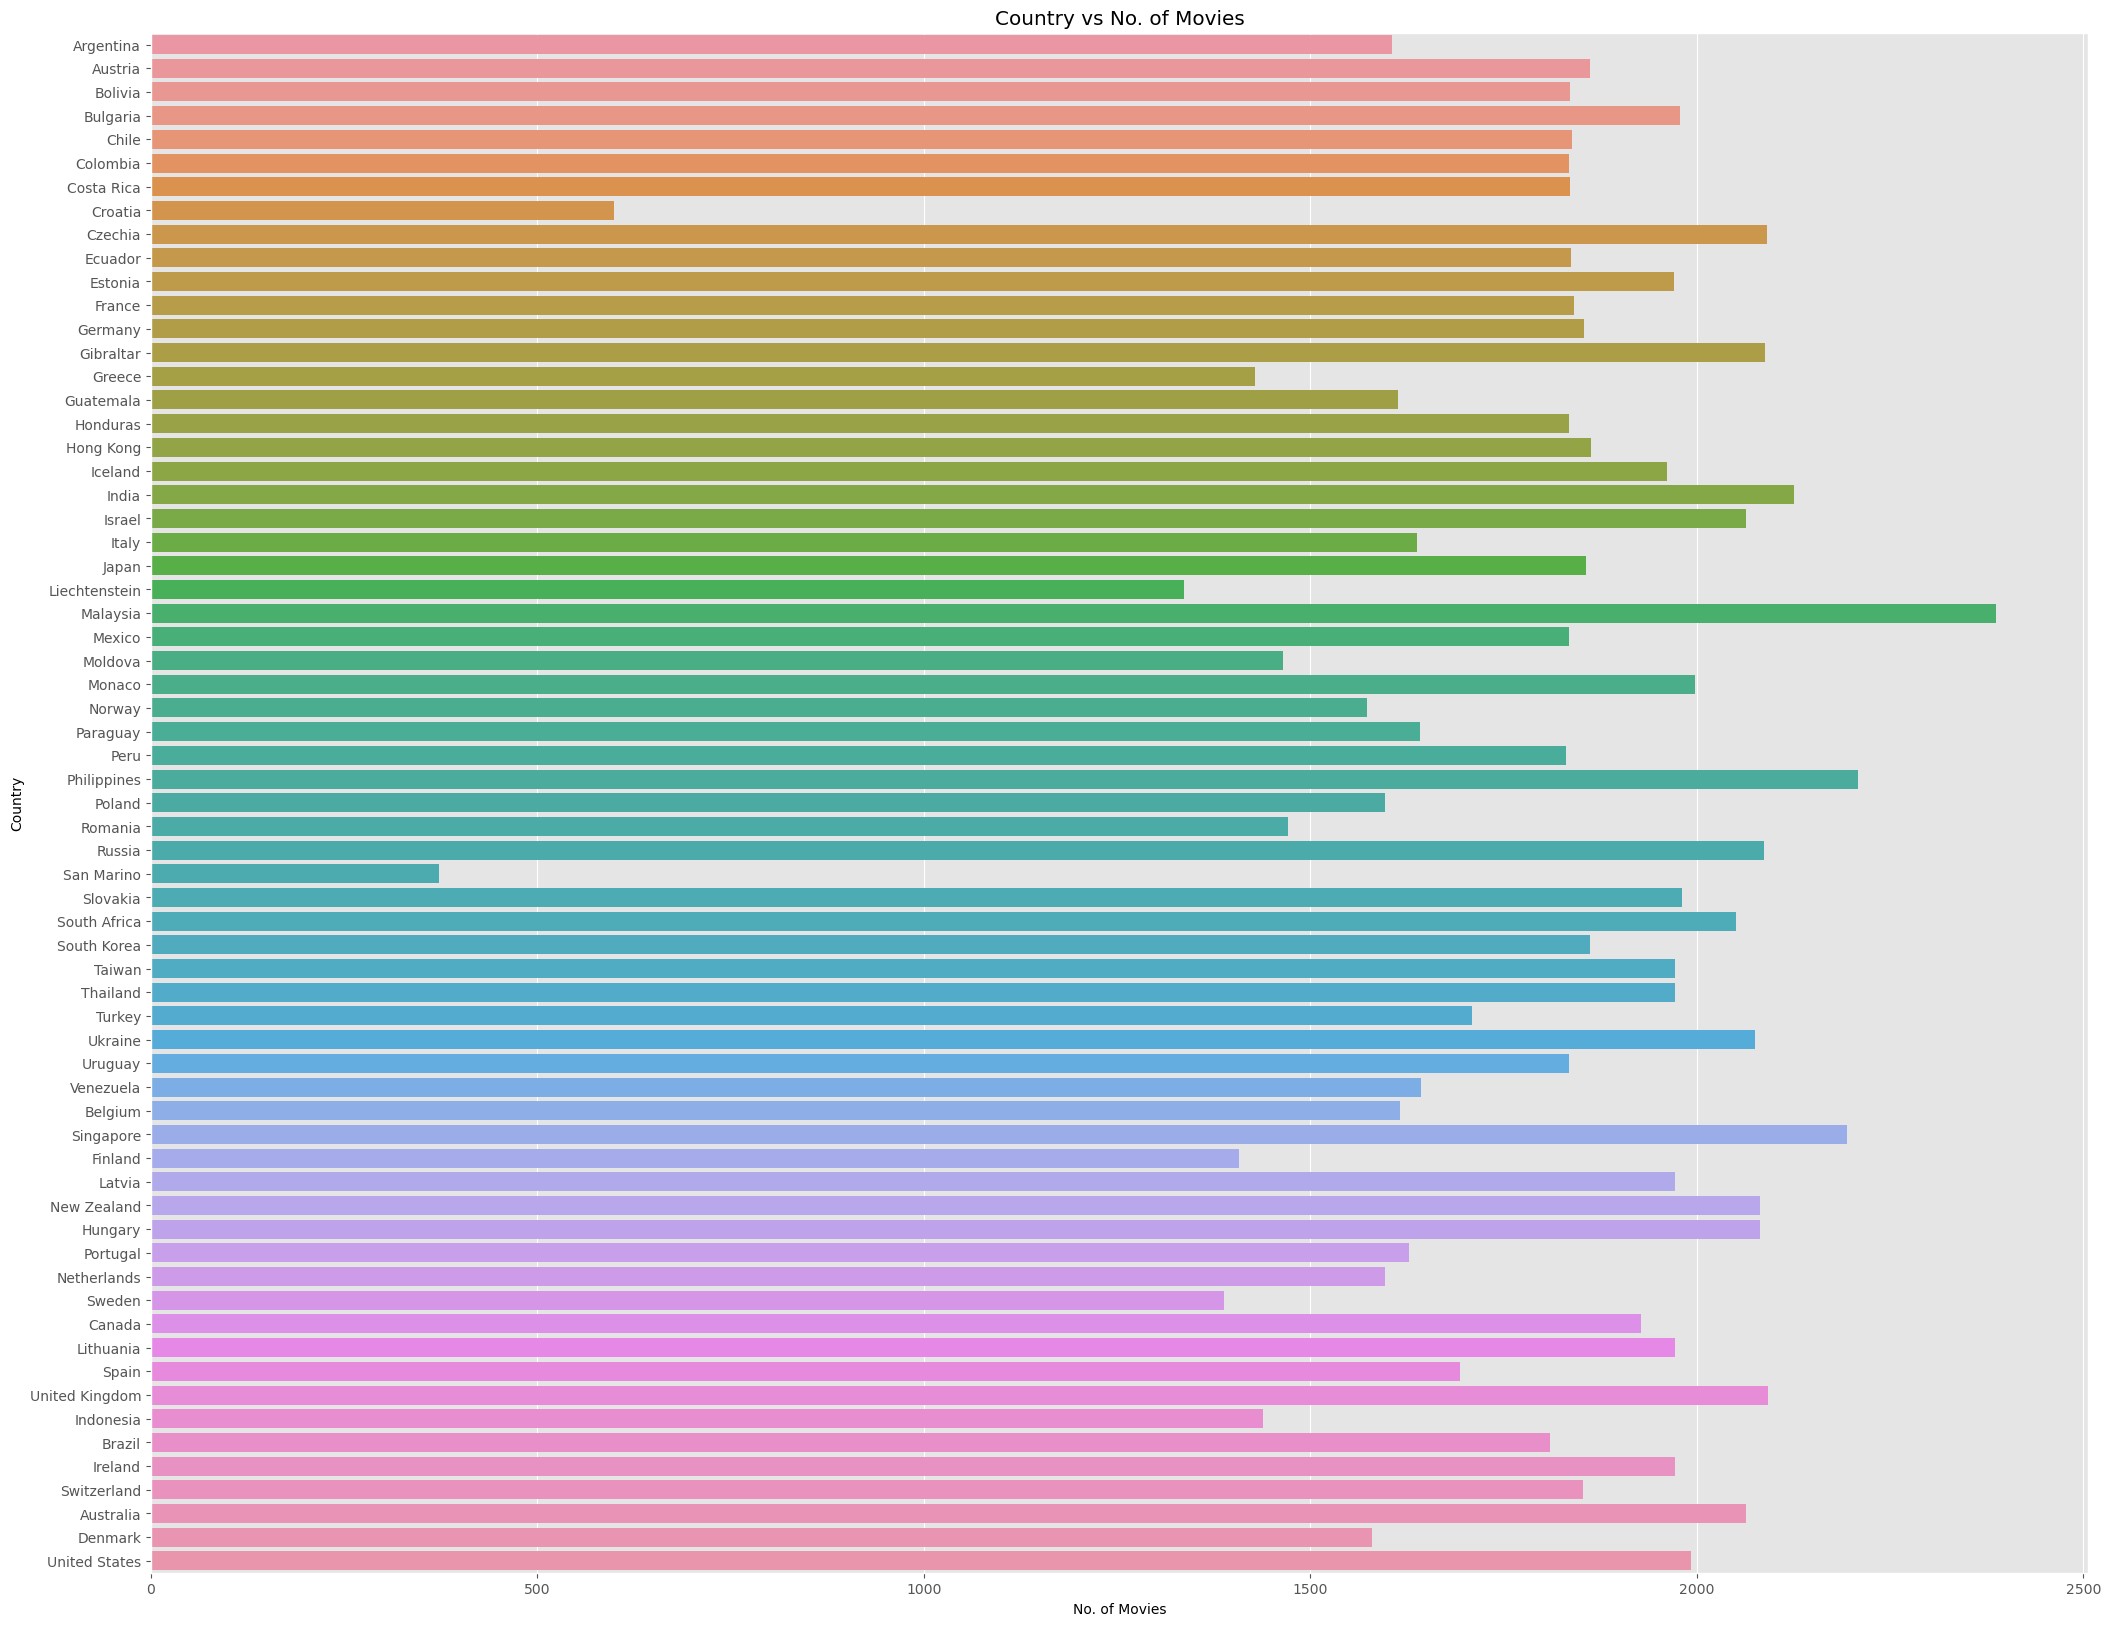

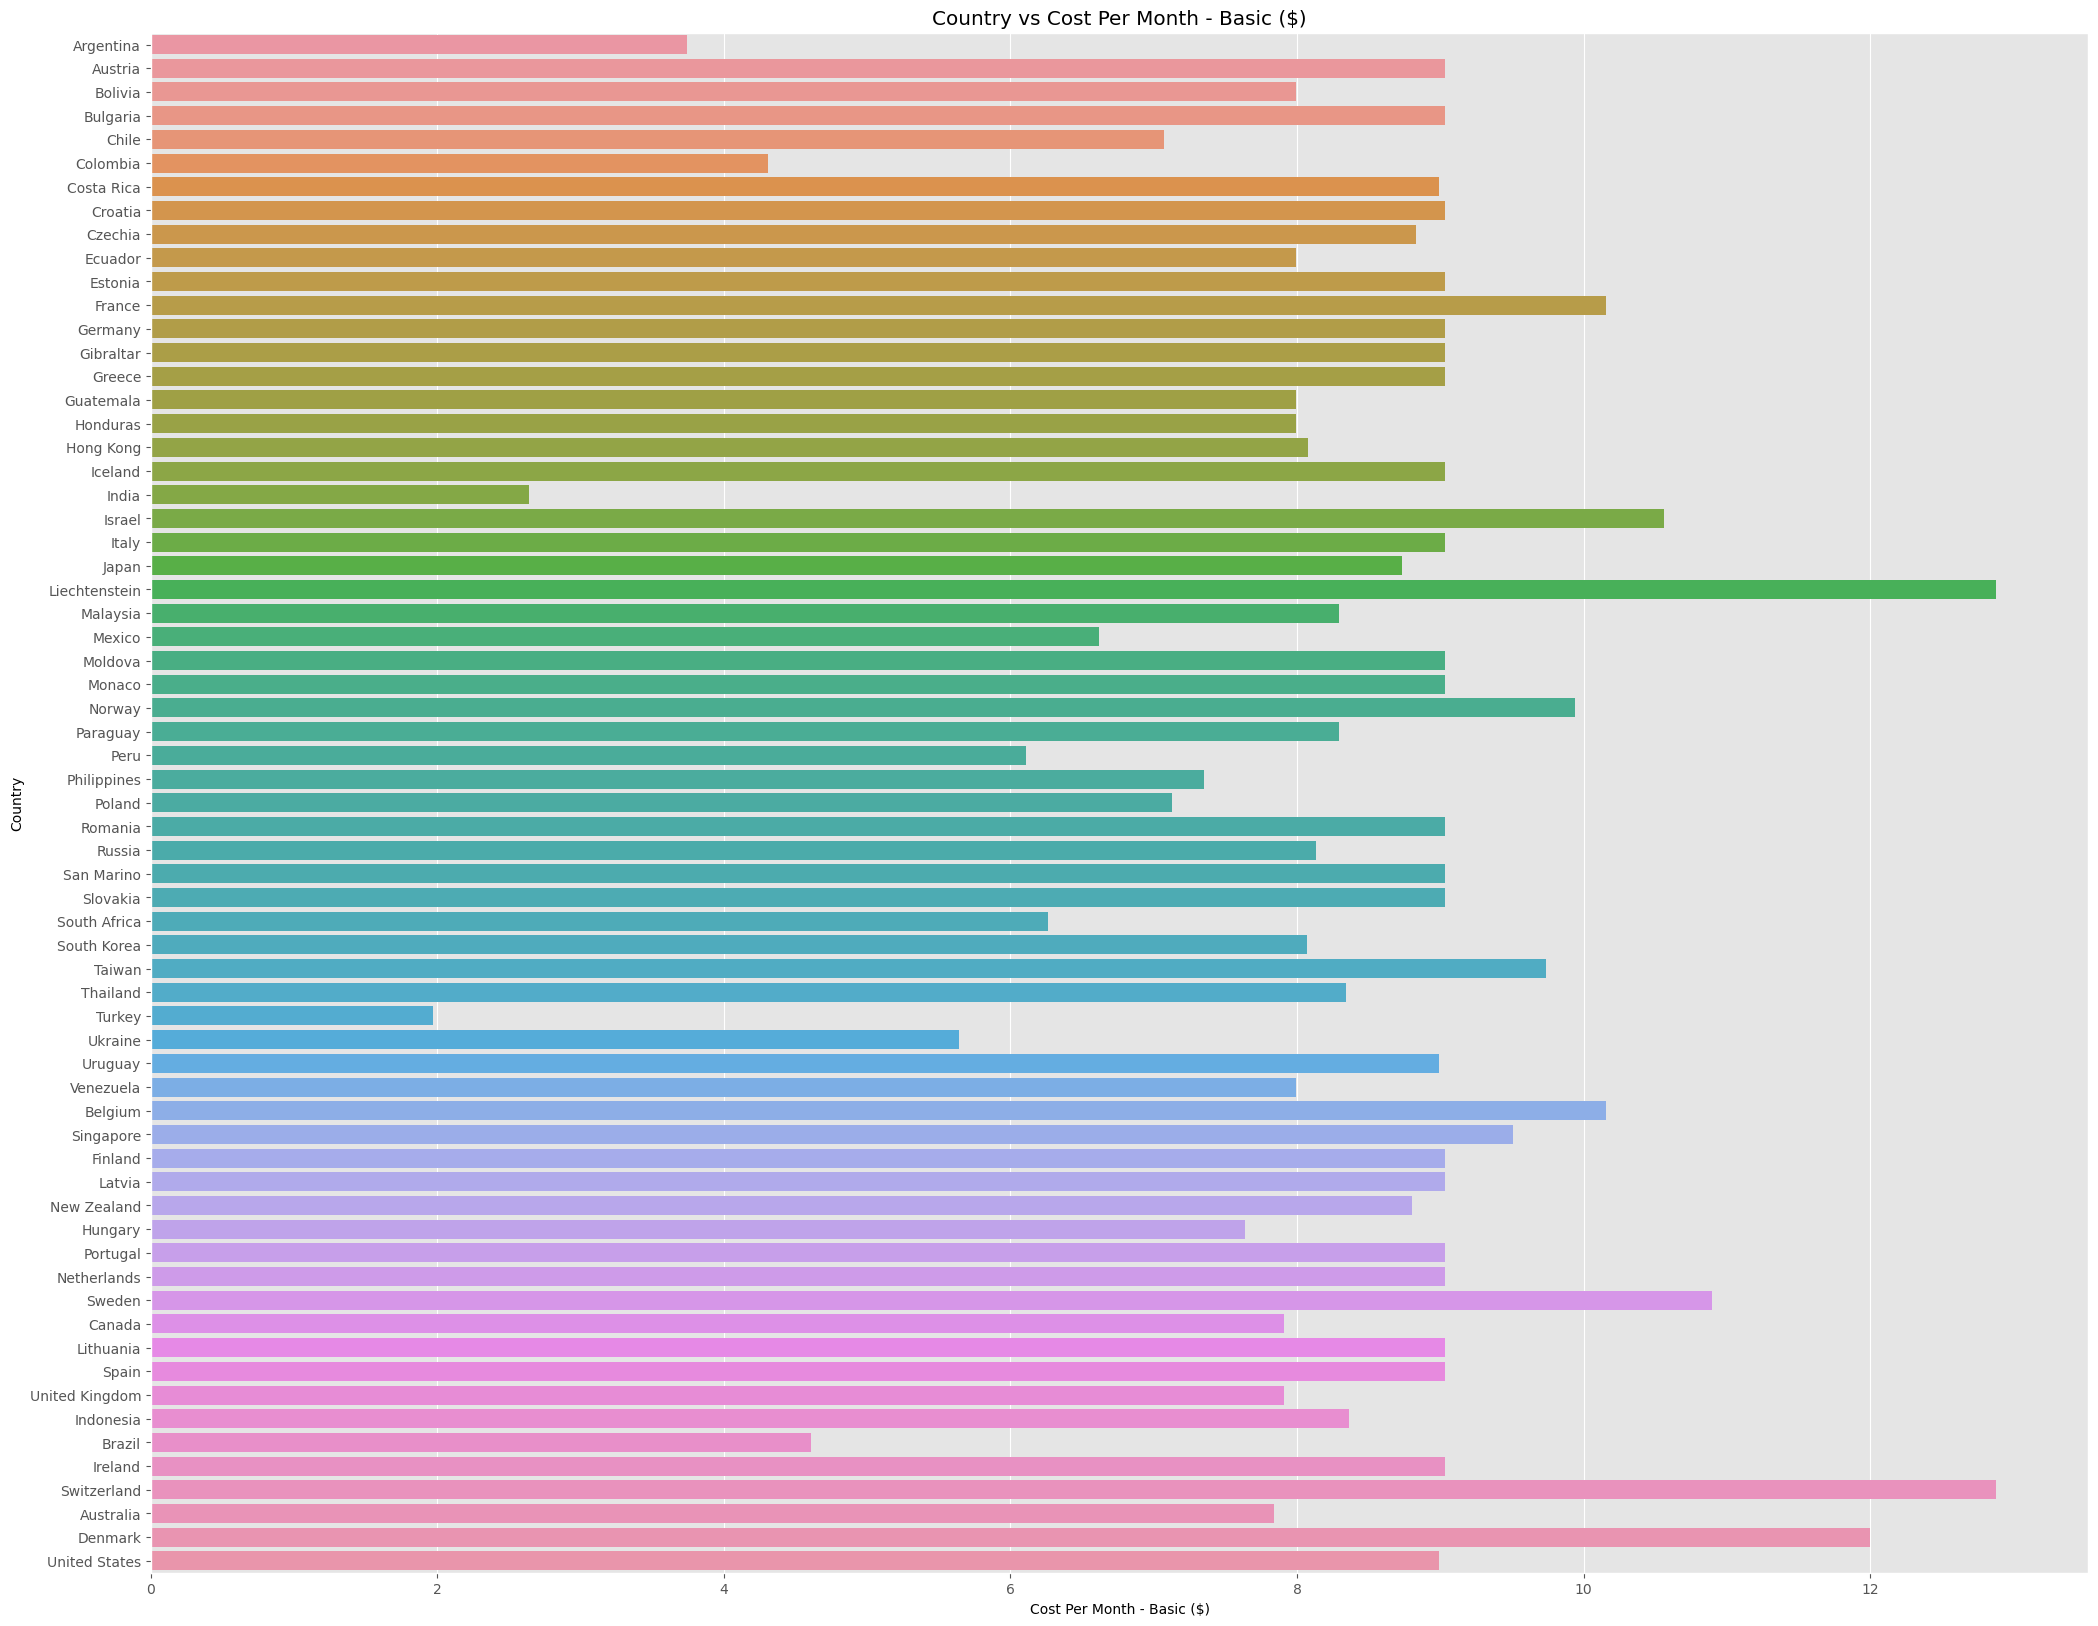

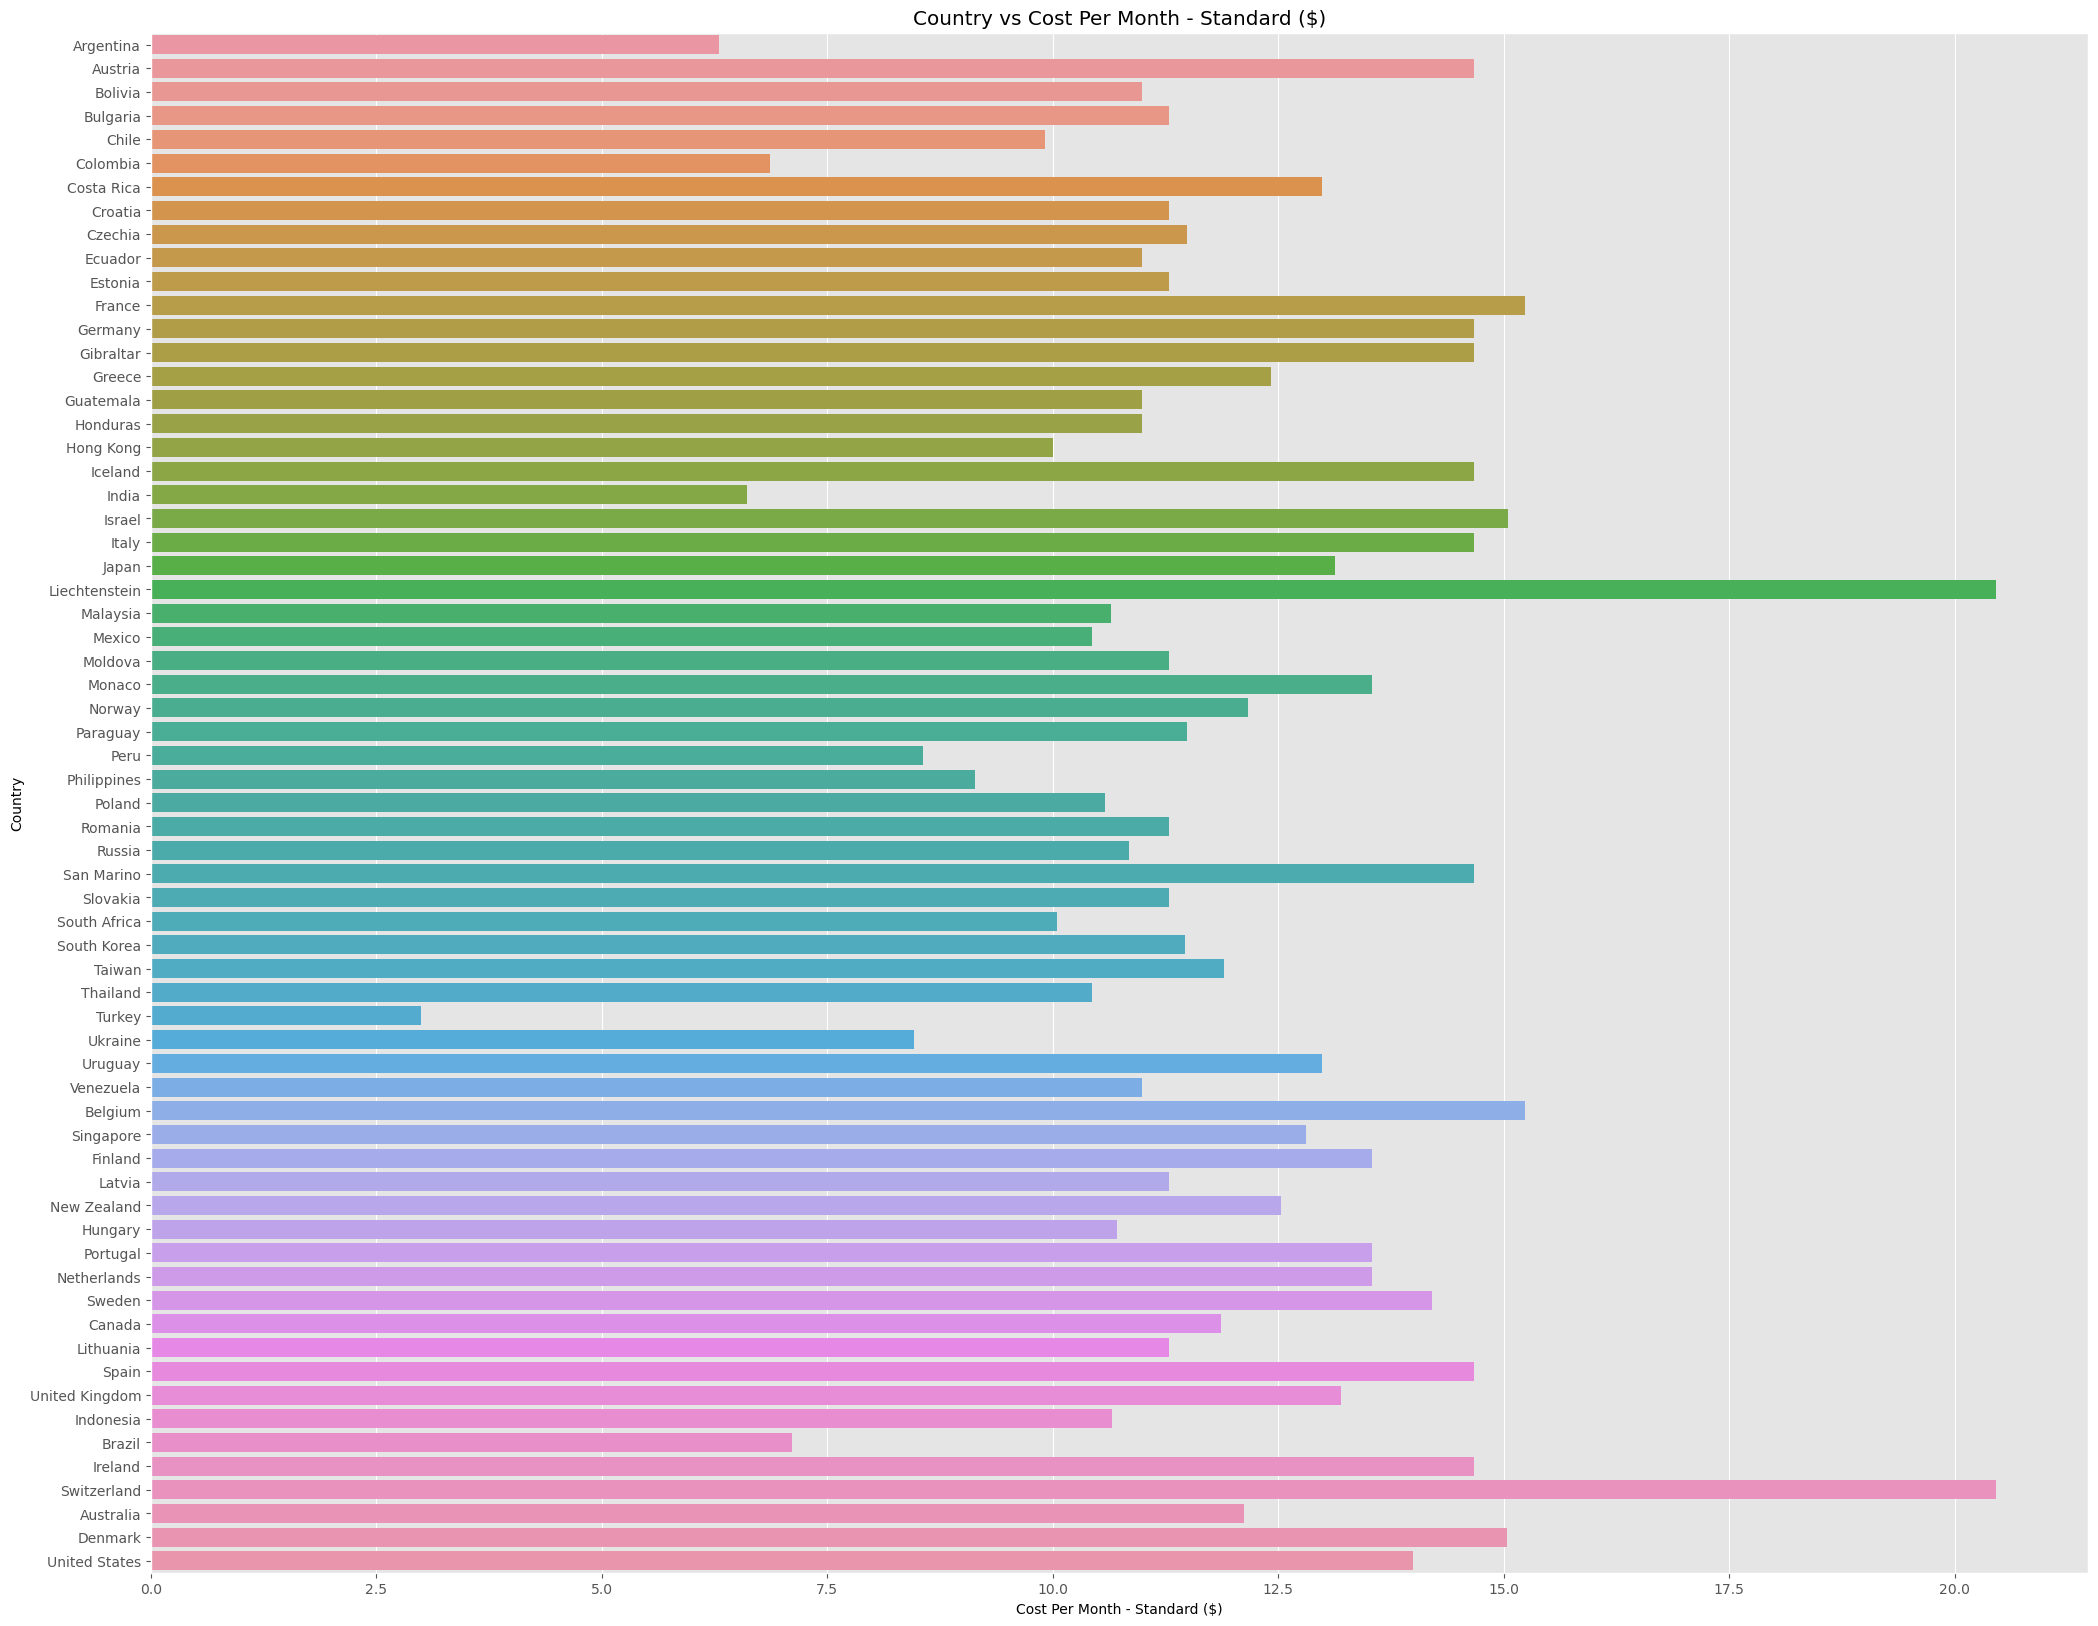

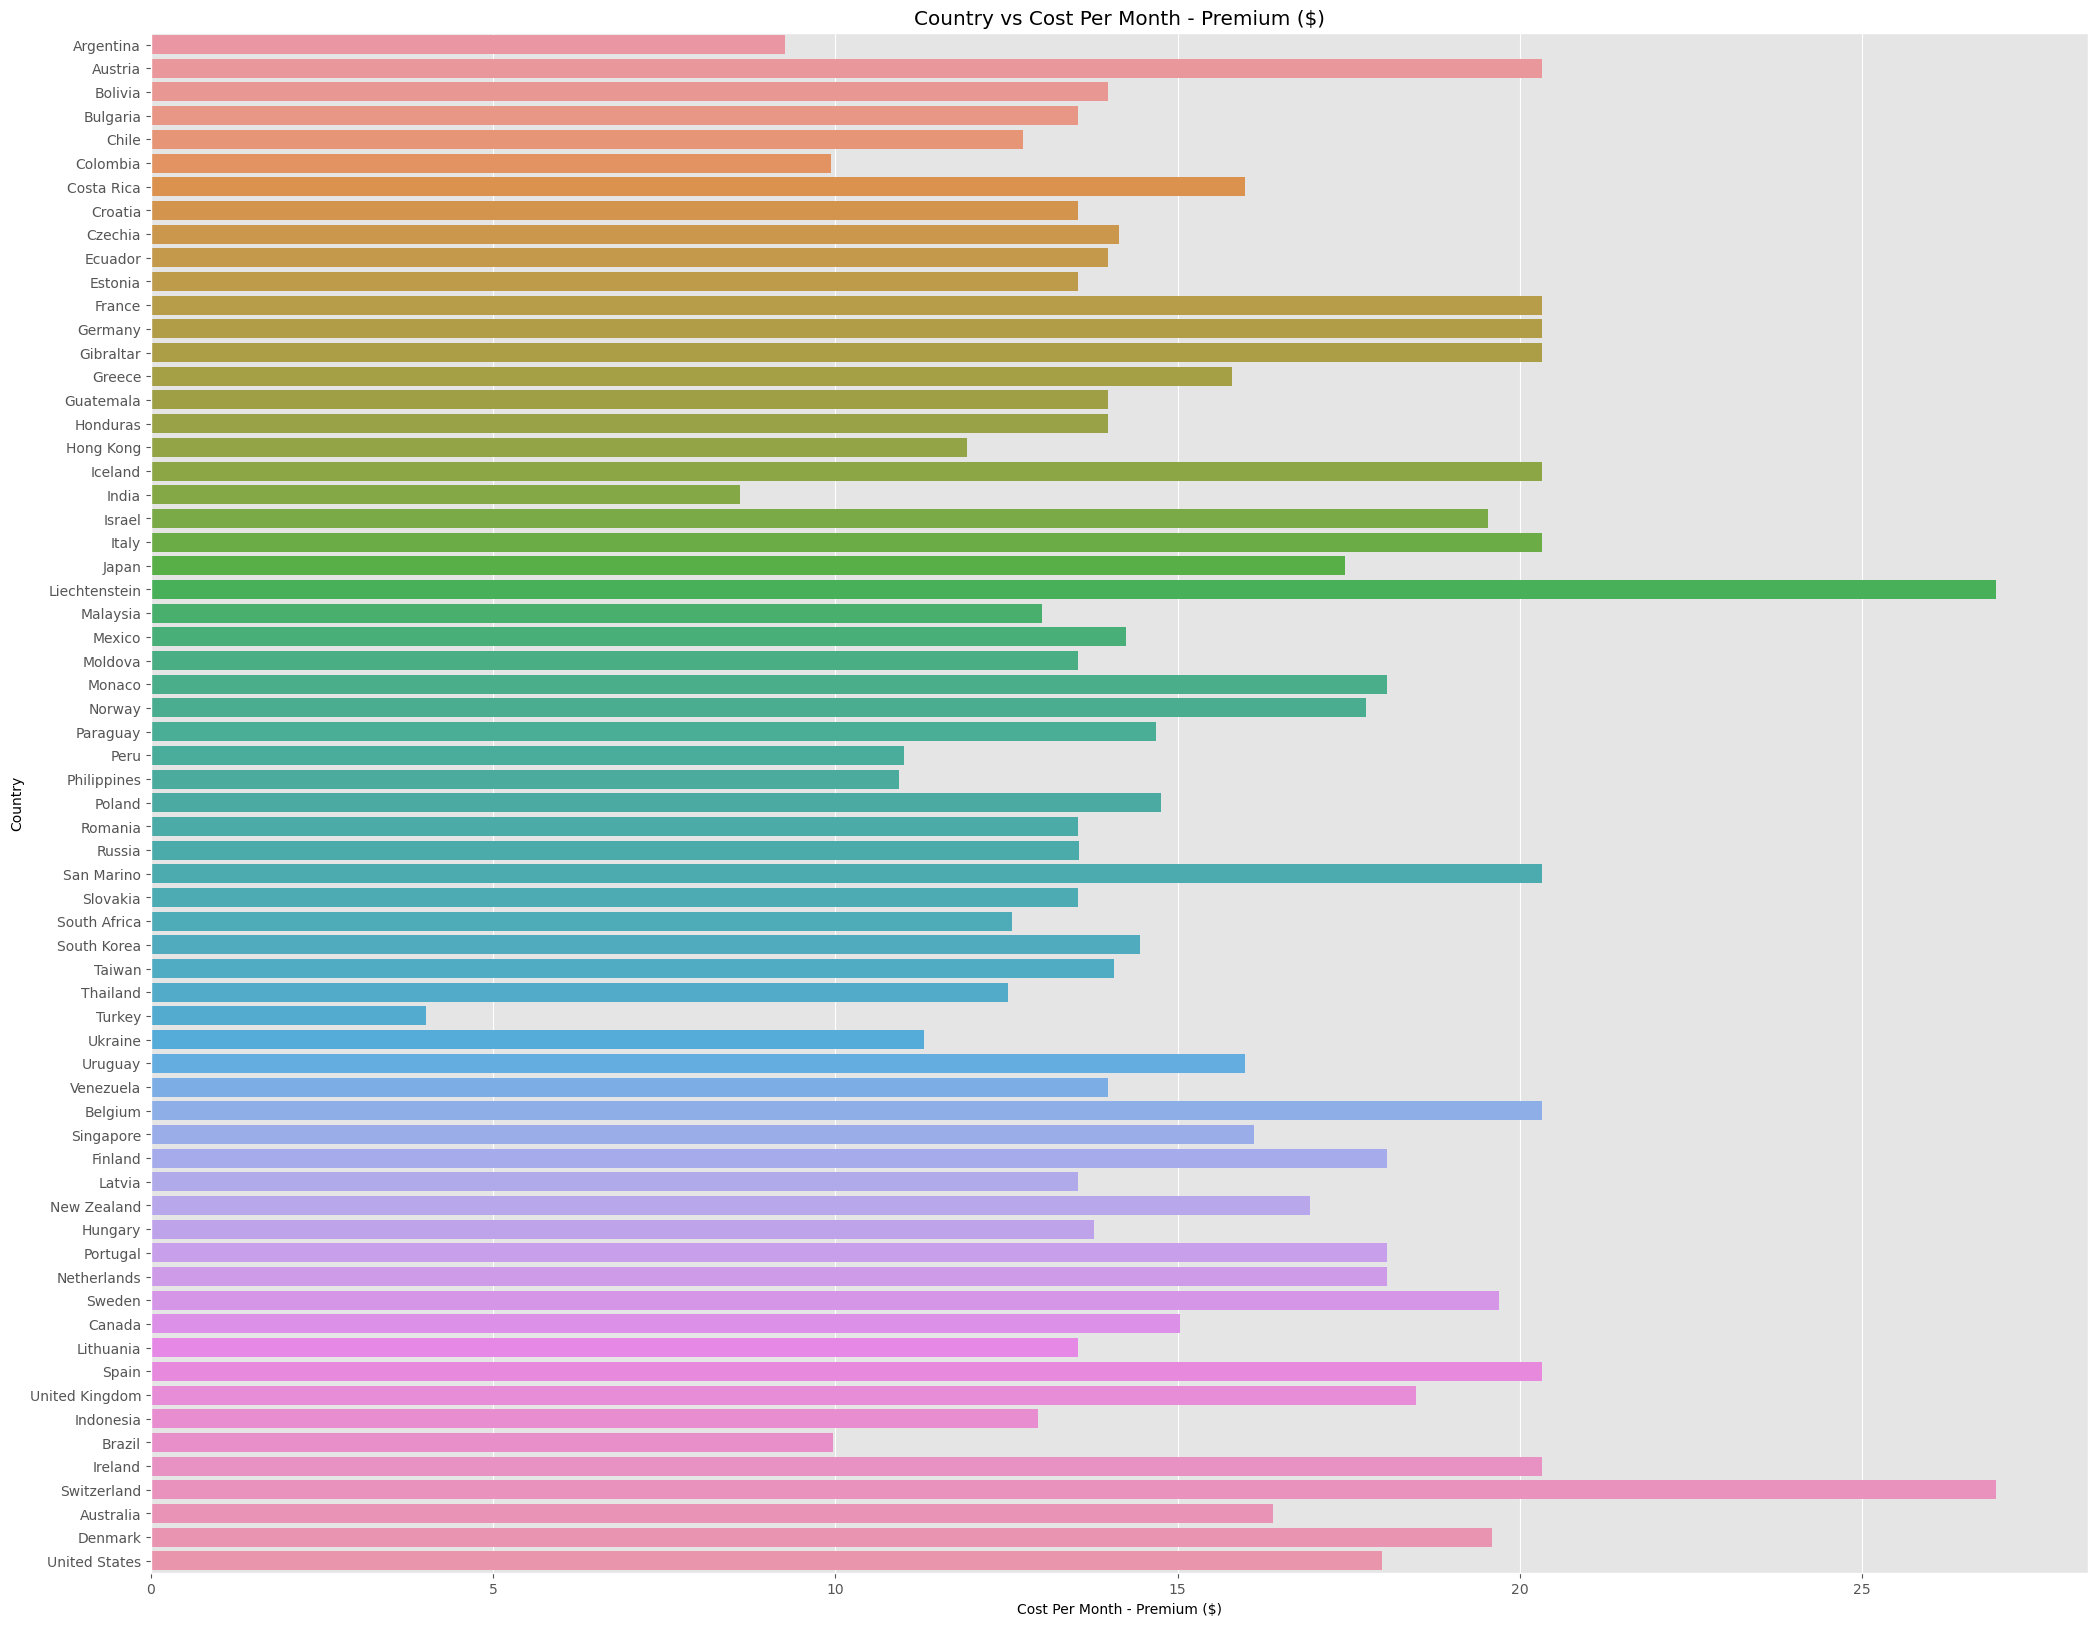

In [65]:
for i in col:
    Bar(i)

In [53]:
df.head()

Country  Total Library Size  No. of TV Shows  No. of Movies  \
0  Argentina                4760             3154           1606   
1    Austria                5640             3779           1861   
2    Bolivia                4991             3155           1836   
3   Bulgaria                6797             4819           1978   
4      Chile                4994             3156           1838   

   Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                        3.74                           6.30   
1                        9.03                          14.67   
2                        7.99                          10.99   
3                        9.03                          11.29   
4                        7.07                           9.91   

   Cost Per Month - Premium ($)  
0                          9.26  
1                         20.32  
2                         13.99  
3                         13.54  
4                         12.74

##### Analysis in 3D


In [56]:
# Number of shows and no. of movies of basic plans in evry country:

fig = px.scatter_3d(df, x='No. of TV Shows', y='No. of Movies', z = 'Cost Per Month - Basic ($)', color = 'Country')
fig.show()

In [55]:
#Number of shows and number of movies of standard plans n every country

fig = px.scatter_3d(df, x = 'No. of TV Shows', y = 'No. of Movies', z = 'Cost Per Month - Standard ($)', color = 'Country')
fig.show()